# Data preprocessing

In this Notebook we will prepare the data for the ML model and document everything properly! :)


## Imports

All necessary package imports for the data cleaning.

In [ ]:
import pandas as pd
!pip install emoji
import emoji as emo
!pip install -U spacy
!python3 -m spacy download de_core_news_sm
import spacy
import sklearn
import seaborn as sn
import matplotlib.pyplot as plt
from nltk.stem.snowball import GermanStemmer
from wordcloud import WordCloud,STOPWORDS
from google.colab import drive
from keras.models import load_model

Requirement already up-to-date: spacy in /usr/local/lib/python3.7/dist-packages (3.1.0)
2021-07-11 19:51:48.470333: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
✔ Download and installation successful
You can now load the package via spacy.load('de_core_news_sm')


## Raw Data import

Import csv from project Github into a panda dataframe

In [ ]:
drive.mount("/content/gdrive", force_remount=True)
#data_path = "/content/gdrive/My Drive/data/facebook_data_utf8.csv"
data_path = "/content/gdrive/My Drive/data/friends_de_encoded.csv"

Mounted at /content/gdrive


### FB part

In [ ]:
df_fb = pd.read_csv(data_path, encoding="utf-8", delimiter=";")
df_fb

,speaker,utterance,emotion,german,annotation,sid,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,1E+14,Sorry to bother you but do you have the 270 te...,neutral,"Entschuldigen Sie die Störung, aber haben Sie ...",4001000.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1E+14,What's it called,neutral,Wie heißt es,4000010.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1E+14,Digital design and principles I think,neutral,Digitales Design und Prinzipien Ich denke,5000000.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1E+14,I don't think so?,neutral,Das glaube ich nicht.,3000020.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1E+14,I could be wrong,neutral,Ich könnte falsch liegen,5000000.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10764,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10765,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10766,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10767,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_fb = df_fb[["german", "emotion", "sid"]]

In [ ]:
df = df_fb.dropna()

In [ ]:
print(df_fb.loc[[4]]["german"])
df

4    Ich könnte falsch liegen
Name: german, dtype: object


,german,emotion,sid
0,"Entschuldigen Sie die Störung, aber haben Sie ...",neutral,0.0
1,Wie heißt es,neutral,0.0
2,Digitales Design und Prinzipien Ich denke,neutral,0.0
3,Das glaube ich nicht.,neutral,0.0
4,Ich könnte falsch liegen,neutral,0.0
...,...,...,...
10751,Es ist Young Money,neutral,719.0
10752,"Oh, ich habe in der Nähe der 73er nach unten g...",surprise,719.0
10753,Sie sind bei 86,neutral,719.0
10754,"Ja, aber ich weiß nicht, ob die 15%, die man f...",neutral,719.0


In [ ]:
df.sid = df.sid.astype(int)
df

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,german,emotion,sid
0,"Entschuldigen Sie die Störung, aber haben Sie ...",neutral,0
1,Wie heißt es,neutral,0
2,Digitales Design und Prinzipien Ich denke,neutral,0
3,Das glaube ich nicht.,neutral,0
4,Ich könnte falsch liegen,neutral,0
...,...,...,...
10751,Es ist Young Money,neutral,719
10752,"Oh, ich habe in der Nähe der 73er nach unten g...",surprise,719
10753,Sie sind bei 86,neutral,719
10754,"Ja, aber ich weiß nicht, ob die 15%, die man f...",neutral,719


In [ ]:
df = df.rename(columns={'german': 'body', 'sid': 'conversation-id'})
df

,body,emotion,conversation-id
0,"Entschuldigen Sie die Störung, aber haben Sie ...",neutral,0
1,Wie heißt es,neutral,0
2,Digitales Design und Prinzipien Ich denke,neutral,0
3,Das glaube ich nicht.,neutral,0
4,Ich könnte falsch liegen,neutral,0
...,...,...,...
10751,Es ist Young Money,neutral,719
10752,"Oh, ich habe in der Nähe der 73er nach unten g...",surprise,719
10753,Sie sind bei 86,neutral,719
10754,"Ja, aber ich weiß nicht, ob die 15%, die man f...",neutral,719


In [ ]:
df.to_csv('/content/gdrive/My Drive/data/facebook_data.csv', encoding='utf-8', index=False)

### Friends part

In [ ]:
df_friends = pd.read_csv(data_path)
df_friends

,Unnamed: 0,ID,utterance,emotion,Dialogue_ID,StartTime,EndTime
0,0,10,"{\an}Ich bin wieder in der Highschool, stehe m...",neutral,559,2021-06-18 00:01:19.000,2021-06-18 00:01:21.872
1,1,12,Den Traum hatte ich auch schon mal.,neutral,559,2021-06-18 00:01:25.000,2021-06-18 00:01:27.168
2,2,13,"Dann schaue ich runter und erkenne, dass da ei...",surprise,559,2021-06-18 00:01:27.000,2021-06-18 00:01:30.922
3,3,15,"Statt deinem... Ja, das meine ich!",surprise,559,2021-06-18 00:01:34.000,2021-06-18 00:01:36.845
4,4,15,"Statt deinem... Ja, das meine ich!",neutral,559,2021-06-18 00:01:34.000,2021-06-18 00:01:36.845
...,...,...,...,...,...,...,...
10259,10268,84294,"Es hat mir geholfen, dein Gesicht in der Menge...",joy,610,2021-06-18 00:30:41.000,2021-06-18 00:30:45.575
10260,10269,84397,"Tja, ich werde jetzt sehen, ob ich ein Zimmer ...",neutral,1,2021-06-18 00:36:52.000,2021-06-18 00:36:56.245
10261,10270,84441,Glaubst du? Ja.,neutral,162,2021-06-18 00:40:21.000,2021-06-18 00:40:22.919
10262,10271,84442,Glaubst du das wirklich? Ja!,neutral,162,2021-06-18 00:40:23.000,2021-06-18 00:40:24.921


In [ ]:
df = df_friends.rename(columns={'utterance': 'body', 'Dialogue_ID': 'conversation_id'})
df

,Unnamed: 0,ID,body,emotion,conversation_id,StartTime,EndTime
0,0,10,"{\an}Ich bin wieder in der Highschool, stehe m...",neutral,559,2021-06-18 00:01:19.000,2021-06-18 00:01:21.872
1,1,12,Den Traum hatte ich auch schon mal.,neutral,559,2021-06-18 00:01:25.000,2021-06-18 00:01:27.168
2,2,13,"Dann schaue ich runter und erkenne, dass da ei...",surprise,559,2021-06-18 00:01:27.000,2021-06-18 00:01:30.922
3,3,15,"Statt deinem... Ja, das meine ich!",surprise,559,2021-06-18 00:01:34.000,2021-06-18 00:01:36.845
4,4,15,"Statt deinem... Ja, das meine ich!",neutral,559,2021-06-18 00:01:34.000,2021-06-18 00:01:36.845
...,...,...,...,...,...,...,...
10259,10268,84294,"Es hat mir geholfen, dein Gesicht in der Menge...",joy,610,2021-06-18 00:30:41.000,2021-06-18 00:30:45.575
10260,10269,84397,"Tja, ich werde jetzt sehen, ob ich ein Zimmer ...",neutral,1,2021-06-18 00:36:52.000,2021-06-18 00:36:56.245
10261,10270,84441,Glaubst du? Ja.,neutral,162,2021-06-18 00:40:21.000,2021-06-18 00:40:22.919
10262,10271,84442,Glaubst du das wirklich? Ja!,neutral,162,2021-06-18 00:40:23.000,2021-06-18 00:40:24.921


In [ ]:
df = df[["ID", "body", "emotion", "conversation_id"]]
df

,ID,body,emotion,conversation_id
0,10,"{\an}Ich bin wieder in der Highschool, stehe m...",neutral,559
1,12,Den Traum hatte ich auch schon mal.,neutral,559
2,13,"Dann schaue ich runter und erkenne, dass da ei...",surprise,559
3,15,"Statt deinem... Ja, das meine ich!",surprise,559
4,15,"Statt deinem... Ja, das meine ich!",neutral,559
...,...,...,...,...
10259,84294,"Es hat mir geholfen, dein Gesicht in der Menge...",joy,610
10260,84397,"Tja, ich werde jetzt sehen, ob ich ein Zimmer ...",neutral,1
10261,84441,Glaubst du? Ja.,neutral,162
10262,84442,Glaubst du das wirklich? Ja!,neutral,162


### Print dataframe structure

In [ ]:
print(df.shape)
print(df.columns)
print(df.head(10))

(10733, 3)
Index(['body', 'emotion', 'conversation-id'], dtype='object')
                                                body  ... conversation-id
0  Entschuldigen Sie die Störung, aber haben Sie ...  ...               0
1                                       Wie heißt es  ...               0
2          Digitales Design und Prinzipien Ich denke  ...               0
3                              Das glaube ich nicht.  ...               0
4                           Ich könnte falsch liegen  ...               0
5  Ok, das ist in Ordnung. Ich bemühe mich nur, n...  ...               0
6                    Sie brauchen den Ausleger nicht  ...               0
7                                              *Buch  ...               0
8        Wenn ich sie habe, habe ich sie nie benutzt  ...               0
9              Aber Sie hatten einen guten Professor  ...               0

[10 rows x 3 columns]


## Data Insights

### Generate simple descriptive statistics and column informtion

In [ ]:
df.describe()

,ID,conversation_id
count,10264.000000,10264.000000
mean,43266.495421,419.980125
std,22019.902522,318.255799
min,10.000000,0.000000
25%,29631.500000,129.000000
50%,46164.000000,342.000000
75%,60263.000000,685.000000
max,84529.000000,1038.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10264 entries, 0 to 10263
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ID               10264 non-null  int64 
 1   body             10264 non-null  object
 2   emotion          10264 non-null  object
 3   conversation_id  10264 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 320.9+ KB


### Sort dataframe by timestamp



In [ ]:
# make df ascencing in time
df = df.sort_values(by=['id', 'timestamp'])

### Count messages per participant

In [ ]:
count_messages = []

# pairs need to be strings because leading 0 is not allowed in int
pairs = [("10", "15"), ("01", "16"), ("03", "04"), ("13", "19"), ("14", "07"), ("12", "18"), ("06", "17")]

# filter only messages for every pair
for pair in pairs:
    print("User", pair[0], "and", pair[1])
    user1 = "user" + str(pair[0])
    user2 = "user" + str(pair[1])
    filtered_df = df[((df.user == user1) & (df.recipient == user2)) | ((df.user == user2) & (df.recipient == user1))][["body", "recipient", "user"]]
    #print(filtered_df)
    count_messages.append(len(filtered_df))
# print(count_messages)

User 10 and 15
User 01 and 16
User 03 and 04
User 13 and 19
User 14 and 07
User 12 and 18
User 06 and 17


### Print messages grouped by scenario and participants

In [ ]:
for pair in pairs:
    user1 = "user" + str(pair[0])
    user2 = "user" + str(pair[1])
    #Printing all scenarios for two users
    scenarios = df[((df.user == user1) & (df.recipient == user2)) | ((df.user == user2) & (df.recipient == user1))].sid.unique()
    #print("All scenarios:", scenarios)
    #Printing DF for each of the scenarios
    for scenario in scenarios:
        print("User", pair[0], "and", pair[1], "scenario:", scenario)
        scenario_filter = \
        df[((df.user == user1) & (df.recipient == user2) & (df.sid == scenario)) | ((df.user == user2) & (df.recipient == user1) & (df.sid == scenario))][
            ["body", "recipient", "user", "sid"]]
         # print(scenario_filter, "\n")

User 10 and 15 scenario: 1
User 10 and 15 scenario: 2
User 10 and 15 scenario: 0
User 10 and 15 scenario: 3
User 10 and 15 scenario: 4
User 10 and 15 scenario: 5
User 10 and 15 scenario: 6
User 10 and 15 scenario: 7
User 10 and 15 scenario: 8
User 10 and 15 scenario: 9
User 10 and 15 scenario: 10
User 10 and 15 scenario: 11
User 10 and 15 scenario: 12
User 01 and 16 scenario: 17
User 01 and 16 scenario: 18
User 01 and 16 scenario: 19
User 01 and 16 scenario: 20
User 01 and 16 scenario: 21
User 01 and 16 scenario: 22
User 01 and 16 scenario: 23
User 01 and 16 scenario: 24
User 01 and 16 scenario: 25
User 01 and 16 scenario: 26
User 01 and 16 scenario: 27
User 01 and 16 scenario: 28
User 03 and 04 scenario: 1
User 03 and 04 scenario: 2
User 03 and 04 scenario: 3
User 03 and 04 scenario: 4
User 03 and 04 scenario: 5
User 03 and 04 scenario: 6
User 03 and 04 scenario: 7
User 03 and 04 scenario: 8
User 03 and 04 scenario: 9
User 03 and 04 scenario: 10
User 03 and 04 scenario: 11
User 03 and

In [ ]:
df.head()

,Unnamed: 0,ID,utterance,emotion,Dialogue_ID,StartTime,EndTime
0,0,10,"{\an}Ich bin wieder in der Highschool, stehe m...",neutral,559,2021-06-18 00:01:19.000,2021-06-18 00:01:21.872
1,1,12,Den Traum hatte ich auch schon mal.,neutral,559,2021-06-18 00:01:25.000,2021-06-18 00:01:27.168
2,2,13,"Dann schaue ich runter und erkenne, dass da ei...",surprise,559,2021-06-18 00:01:27.000,2021-06-18 00:01:30.922
3,3,15,"Statt deinem... Ja, das meine ich!",surprise,559,2021-06-18 00:01:34.000,2021-06-18 00:01:36.845
4,4,15,"Statt deinem... Ja, das meine ich!",neutral,559,2021-06-18 00:01:34.000,2021-06-18 00:01:36.845


## Data Cleaning

### Drop Rows where sid == 0

In [ ]:
print("Sum over sid == 0:", sum(df['sid'] == 0))
df = df[df.sid != 0]

Sum over sid == 0: 177


In [ ]:
df.head()

,id,user,recipient,sid,timestamp,body
2192,68,Konsti,user07,1,2021-06-14 18:14:18.811806+00:00,Beginne Szenario 1
2188,72,Konsti,user07,1,2021-06-14 18:14:52.338264+00:00,Szenario 1 beendet
2180,80,user06,user12,15,2021-06-14 18:21:39.474768+00:00,Beginne Szenario 15
2172,88,user06,user12,15,2021-06-14 18:22:29.301792+00:00,hey na alles klar 😊🥰 ? wie gehts dir 👀
2171,89,User02,user08,1,2021-06-14 18:22:32.211374+00:00,Beginne Szenario 1


### Drop rows where body "Beginne Szenario X" and "Szenario X beendet"

In [ ]:
print(len(df)) #2090
i = 1
dummy_list = []
while i < 29:
  dummy_list.append(df[df.body == "Beginne Szenario %s" % (i)])
  dummy_list.append(df[df.body == "Szenario %s beendet" % (i)])

  df = df[df.body != "Beginne Szenario %s" % (i)]
  df = df[df.body != "Szenario %s beendet" % (i)]
  i += 1

print(dummy_list)
print(len(df))

4038
[        id    user  ...                         timestamp                body
2192    68  Konsti  ...  2021-06-14 18:14:18.811806+00:00  Beginne Szenario 1
2171    89  User02  ...  2021-06-14 18:22:32.211374+00:00  Beginne Szenario 1
2169    91  user15  ...  2021-06-14 18:22:35.660500+00:00  Beginne Szenario 1
2167    93  user01  ...  2021-06-14 18:22:49.830583+00:00  Beginne Szenario 1
2078   182  user03  ...  2021-06-14 18:29:00.440345+00:00  Beginne Szenario 1
2027   233  user13  ...  2021-06-14 18:31:31.626405+00:00  Beginne Szenario 1
4210  2269   dpana  ...  2021-06-16 14:00:10.922248+00:00  Beginne Szenario 1
4208  2271    feli  ...  2021-06-16 14:29:34.793823+00:00  Beginne Szenario 1
4202  2277  user03  ...  2021-06-16 14:34:20.750534+00:00  Beginne Szenario 1
4201  2278  user15  ...  2021-06-16 14:34:35.021778+00:00  Beginne Szenario 1
4188  2291  user13  ...  2021-06-16 14:36:00.107972+00:00  Beginne Szenario 1
4163  2316  user12  ...  2021-06-16 14:37:11.243828+00:00 

In [ ]:
df.head(10)

,id,user,recipient,sid,timestamp,body
2172,88,user06,user12,15,2021-06-14 18:22:29.301792+00:00,hey na alles klar 😊🥰 ? wie gehts dir 👀
2164,96,User02,user08,1,2021-06-14 18:22:55.815520+00:00,hey liebe Freundin... steh vor dem Kino und fr...
2163,97,user15,user16,1,2021-06-14 18:23:02.602367+00:00,hey! wo bleibst du ? 😡
2162,98,user12,user06,15,2021-06-14 18:23:03.517448+00:00,Schön von dir zu hören! Heute war einfach ein ...
2161,99,User02,user08,1,2021-06-14 18:23:07.238679+00:00,kommst du noch 👀
2159,101,user12,user06,15,2021-06-14 18:23:18.741249+00:00,Auch das Wetter 😊
2158,102,user01,user07,1,2021-06-14 18:23:20.454133+00:00,"Hey, sag mal wo bleibst du denn? Du bist zieml..."
2155,105,user12,user06,15,2021-06-14 18:23:33.130605+00:00,Und selbst?👀
2154,106,user06,user12,15,2021-06-14 18:23:49.799062+00:00,ja alles super 😊🥰
2153,107,user16,user15,1,2021-06-14 18:23:52.431147+00:00,"Du sorry, ganz blöd gelaufen. Ich kann leider ..."


### Drop neutral emotions

In [ ]:
df.emotion.unique()

array(['neutral', 'surprise', 'sadness', 'fear', 'joy', 'anger',
       'disgust'], dtype=object)

In [ ]:
# delete neutral elements
df = df[df.emotion != "neutral"]
df

,Unnamed: 0,ID,body,emotion,Dialogue_ID,StartTime,EndTime
2,2,13,"Dann schaue ich runter und erkenne, dass da ei...",surprise,559,2021-06-18 00:01:27.000,2021-06-18 00:01:30.922
3,3,15,"Statt deinem... Ja, das meine ich!",surprise,559,2021-06-18 00:01:34.000,2021-06-18 00:01:36.845
7,7,26,Oh.,sadness,164,2021-06-18 00:02:15.000,2021-06-18 00:02:16.092
9,9,46,Ich will nur wieder verheiratet sein.,sadness,769,2021-06-18 00:03:22.000,2021-06-18 00:03:25.453
10,10,47,Und ich will eine Million Dollar!,fear,769,2021-06-18 00:03:29.000,2021-06-18 00:03:32.753
...,...,...,...,...,...,...,...
10246,10255,83468,{\an}Ich glaub's nicht. Meine Gebärmutter ist ...,surprise,268,2021-06-18 00:02:55.000,2021-06-18 00:03:01.579
10247,10256,83470,{\an}Und meine Spermien haben zu wenig Mobilität.,surprise,268,2021-06-18 00:03:05.000,2021-06-18 00:03:07.752
10254,10263,83478,"Oh, so ein Mist!",anger,268,2021-06-18 00:03:29.000,2021-06-18 00:03:31.309
10259,10268,84294,"Es hat mir geholfen, dein Gesicht in der Menge...",joy,610,2021-06-18 00:30:41.000,2021-06-18 00:30:45.575


### Extract emojis 

In [ ]:
#EMOJIS = ['😊','🥰','😱','😲','😢','🤢','😡','👀']
#EMOJIS = ['joy', 'trust', 'fear', 'surprise', 'sadness', 'disgust', 'anger', 'anticipation']
EMOJIS = ['joy', 'trust', 'fear', 'surprise', 'sadness', 'disgust', 'anger', 'anticipation', 'neutral'] #, 'non-neutral']

#generates columns for each emoji
#replaces emoji in body if found
#adds 1 on according emoji column if found in body
def extract_emoji(df):
    for emoji in EMOJIS:
        df[emoji] = ""

    for index, row in df['emotion'].iteritems():
        for emoji in EMOJIS:
            if emoji in row:
                df['body'][index] = df['body'][index].replace(emoji, "")
                df[emoji][index] = 1
            else:
                df[emoji][index] = 0

extract_emoji(df)
df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
 

,ID,body,emotion,conversation_id,joy,trust,fear,surprise,sadness,disgust,anger,anticipation,neutral
0,10,"{\an}Ich bin wieder in der Highschool, stehe m...",neutral,559,0,0,0,0,0,0,0,0,1
1,12,Den Traum hatte ich auch schon mal.,neutral,559,0,0,0,0,0,0,0,0,1
2,13,"Dann schaue ich runter und erkenne, dass da ei...",surprise,559,0,0,0,1,0,0,0,0,0
3,15,"Statt deinem... Ja, das meine ich!",surprise,559,0,0,0,1,0,0,0,0,0
4,15,"Statt deinem... Ja, das meine ich!",neutral,559,0,0,0,0,0,0,0,0,1


### Removal of punctuation

In [ ]:
# Remove {\an} in friends dataset
df['body'] = df['body'].str.replace(r'{\\an}', '')
df

,ID,body,emotion,conversation_id,joy,trust,fear,surprise,sadness,disgust,anger,anticipation,neutral
0,10,"Ich bin wieder in der Highschool, stehe mitten...",neutral,559,0,0,0,0,0,0,0,0,1
1,12,Den Traum hatte ich auch schon mal.,neutral,559,0,0,0,0,0,0,0,0,1
2,13,"Dann schaue ich runter und erkenne, dass da ei...",surprise,559,0,0,0,1,0,0,0,0,0
3,15,"Statt deinem... Ja, das meine ich!",surprise,559,0,0,0,1,0,0,0,0,0
4,15,"Statt deinem... Ja, das meine ich!",neutral,559,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10259,84294,"Es hat mir geholfen, dein Gesicht in der Menge...",joy,610,1,0,0,0,0,0,0,0,0
10260,84397,"Tja, ich werde jetzt sehen, ob ich ein Zimmer ...",neutral,1,0,0,0,0,0,0,0,0,1
10261,84441,Glaubst du? Ja.,neutral,162,0,0,0,0,0,0,0,0,1
10262,84442,Glaubst du das wirklich? Ja!,neutral,162,0,0,0,0,0,0,0,0,1


In [ ]:
# Remove the punctuation
df['body'] = df['body'].str.replace(r'[^\w\s]+', '')


In [ ]:
df.head()

,ID,body,emotion,conversation_id,joy,trust,fear,surprise,sadness,disgust,anger,anticipation,neutral
0,10,Ich bin wieder in der Highschool stehe mitten ...,neutral,559,0,0,0,0,0,0,0,0,1
1,12,Den Traum hatte ich auch schon mal,neutral,559,0,0,0,0,0,0,0,0,1
2,13,Dann schaue ich runter und erkenne dass da ein...,surprise,559,0,0,0,1,0,0,0,0,0
3,15,Statt deinem Ja das meine ich,surprise,559,0,0,0,1,0,0,0,0,0
4,15,Statt deinem Ja das meine ich,neutral,559,0,0,0,0,0,0,0,0,1


### Removal of unnecessary white spaces

In [ ]:
df['body'] = df['body'].str.strip()
df.head()

,ID,body,emotion,conversation_id,joy,trust,fear,surprise,sadness,disgust,anger,anticipation,neutral
0,10,Ich bin wieder in der Highschool stehe mitten ...,neutral,559,0,0,0,0,0,0,0,0,1
1,12,Den Traum hatte ich auch schon mal,neutral,559,0,0,0,0,0,0,0,0,1
2,13,Dann schaue ich runter und erkenne dass da ein...,surprise,559,0,0,0,1,0,0,0,0,0
3,15,Statt deinem Ja das meine ich,surprise,559,0,0,0,1,0,0,0,0,0
4,15,Statt deinem Ja das meine ich,neutral,559,0,0,0,0,0,0,0,0,1


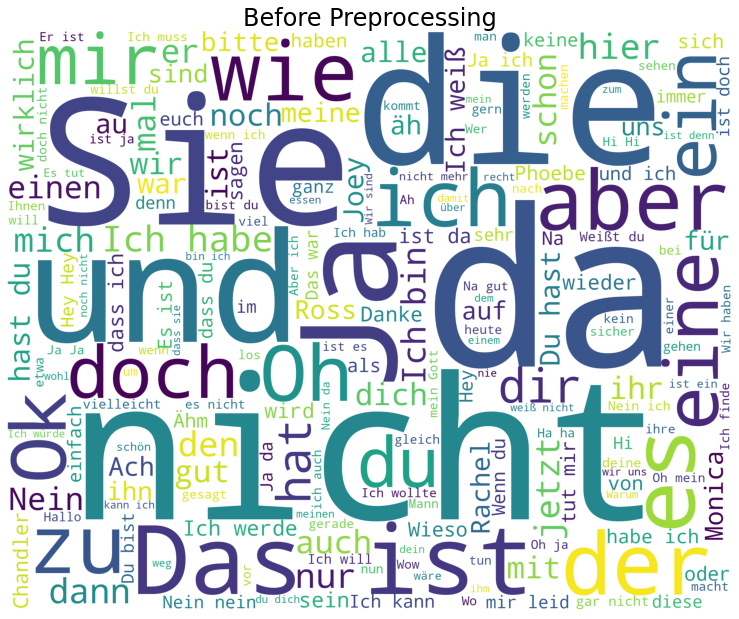

In [ ]:
def wordcloud_draw(data, title, color='black'):
    words = ' '.join(data)
    #print(words)
    wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color=color,
                      width=2500,
                      height=2000
                     ).generate(words)
    plt.figure(1,figsize=(13, 13))
    plt.imshow(wordcloud)
    plt.title(title, fontdict={'fontsize':24})
    plt.axis('off')
    plt.show()

wordcloud_draw(df['body'], "Before Preprocessing", 'white')

### Lowercasing

In [ ]:
# Optional: Add a copy "df_copy" of df to try out stuff
df_copy = df.copy()
df_copy.head()

,ID,body,emotion,conversation_id,joy,trust,fear,surprise,sadness,disgust,anger,anticipation,neutral
0,10,Ich bin wieder in der Highschool stehe mitten ...,neutral,559,0,0,0,0,0,0,0,0,1
1,12,Den Traum hatte ich auch schon mal,neutral,559,0,0,0,0,0,0,0,0,1
2,13,Dann schaue ich runter und erkenne dass da ein...,surprise,559,0,0,0,1,0,0,0,0,0
3,15,Statt deinem Ja das meine ich,surprise,559,0,0,0,1,0,0,0,0,0
4,15,Statt deinem Ja das meine ich,neutral,559,0,0,0,0,0,0,0,0,1


In [ ]:
df = df_copy

In [ ]:
# Remove upper cases
df['body'] = df['body'].apply(lambda x:x.lower())
df.head()


,ID,body,emotion,conversation_id,joy,trust,fear,surprise,sadness,disgust,anger,anticipation,neutral
0,10,ich bin wieder in der highschool stehe mitten ...,neutral,559,0,0,0,0,0,0,0,0,1
1,12,den traum hatte ich auch schon mal,neutral,559,0,0,0,0,0,0,0,0,1
2,13,dann schaue ich runter und erkenne dass da ein...,surprise,559,0,0,0,1,0,0,0,0,0
3,15,statt deinem ja das meine ich,surprise,559,0,0,0,1,0,0,0,0,0
4,15,statt deinem ja das meine ich,neutral,559,0,0,0,0,0,0,0,0,1


### Removal of stop words | Tokenization with spaCy | Stemming


In [ ]:
# FIXME: sp.tokenizer
#sp = spacy.load('de_core_news_sm')
#all_stopwords = sp.Defaults.stop_words
#print(all_stopwords)

#def tokenization(df):
#    for index, row in df['body'].iteritems():
#        body_tokens = sp.tokenizer(df['body'][index])
#        df['body'][index] = [word for word in body_tokens if word not in all_stopwords]

#tokenization(df)
#df.head(100)

In [ ]:
df_copy

,body,emotion,conversation-id,joy,trust,fear,surprise,sadness,disgust,anger,anticipation,neutral
0,Entschuldigen Sie die Störung aber haben Sie d...,neutral,0,0,0,0,0,0,0,0,0,1
1,Wie heißt es,neutral,0,0,0,0,0,0,0,0,0,1
2,Digitales Design und Prinzipien Ich denke,neutral,0,0,0,0,0,0,0,0,0,1
3,Das glaube ich nicht,neutral,0,0,0,0,0,0,0,0,0,1
4,Ich könnte falsch liegen,neutral,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10751,Es ist Young Money,neutral,719,0,0,0,0,0,0,0,0,1
10752,Oh ich habe in der Nähe der 73er nach unten ge...,surprise,719,0,0,0,1,0,0,0,0,0
10753,Sie sind bei 86,neutral,719,0,0,0,0,0,0,0,0,1
10754,Ja aber ich weiß nicht ob die 15 die man für d...,neutral,719,0,0,0,0,0,0,0,0,1


In [ ]:
# Tokenization, stop words removal, stemming and removal of empty strings

sp = spacy.load('de_core_news_sm')
all_stopwords = ['zehntes', 'dein', 'derselben', 'habe', 'das', 'zwar', 'wahr', 'wie', 'kannst', 'drittes', 'aber', 'konnte', 'hätten', 'will', 'andern', 'oder', 'währenddessen', 'seine', 'hin', 'wollten', 'daß', 'fünften', 'sagt', 'geschweige', 'mancher', 'darum', 'vielen', 'solang', 'jedermann', 'demgemäss', 'jeder', 'jede', 'haben', 'viele', 'vom', 'besser', 'jahr', 'können', 'jemand', 'währenddem', 'siebentes', 'dementsprechend', 'könnt', 'allein', 'musst', 'darüber', 'achte', 'vergangene', 'zugleich', 'durfte', 'hoch', 'mehr', 'außerdem', 'dürfen', 'aus', 'ihr', 'solcher', 'keinem', 'vergangenen', 'weiteren', 'nichts', 'früher', 'nach', 'seiner', 'erster', 'erstes', 'trotzdem', 'weitere', 'kleine', 'demselben', 'so', 'darunter', 'es', 'meinem', 'besonders', 'solchen', 'zehnter', 'grossen', 'meinen', 'welche', 'mögen', 'schlecht', 'wegen', 'wenig', 'unsere', 'zeit', 'damals', 'dermassen', 'natürlich', 'neunter', 'genug', 'erste', 'gemocht', 'neuen', 'denen', 'kommt', 'kann', 'kein', 'neuntes', 'warum', 'musste', 'gern', 'wirst', 'alle', 'machte', 'dazu', 'ging', 'gutes', 'machen', 'ach', 'diejenige', 'ganze', 'dieses', 'mein', 'na', 'neunten', 'dritter', 'bereits', 'sechster', 'allen', 'ihnen', 'dazwischen', 'einiger', 'über', 'en', 'mich', 'von', 'werden', 'kaum', 'ihrem', 'dagegen', 'nie', 'ausserdem', 'neue', 'ob', 'sein', 'tat', 'anderen', 'deine', 'danach', 'groß', 'jedoch', 'wurden', 'seinem', 'zweiten', 'durch', 'achter', 'einen', 'deswegen', 'damit', 'rechte', 'möchte', 'daran', 'keiner', 'magst', 'auch', 'vielem', 'derjenigen', 'anders', 'kurz', 'dort', 'sondern', 'um', 'ins', 'neun', 'dasein', 'meines', 'großer', 'wird', 'tag', 'einmaleins', 'sei', 'zehnten', 'tage', 'ihren', 'als', 'davor', 'acht', 'große', 'eigener', 'geworden', 'siebente', 'denselben', 'allgemeinen', 'dritten', 'meine', 'wann', 'gar', 'vielleicht', 'gut', 'hat', 'demgegenüber', 'mag', 'eines', 'weniger', 'zunächst', 'statt', 'anderem', 'könnte', 'dafür', 'beide', 'keinen', 'jeden', 'infolgedessen', 'niemandem', 'leicht', 'jenes', 'gerade', 'grosser', 'irgend', 'jahre', 'dieser', 'wo', 'jene', 'willst', 'ehrlich', 'allerdings', 'jedermanns', 'waren', 'seid', 'deiner', 'ab', 'jedem', 'sechs', 'vier', 'hätte', 'während', 'bisher', 'ganzes', 'manche', 'kommen', 'muß', 'diesem', 'dieselben', 'demzufolge', 'ganzer', 'niemanden', 'bist', 'rechter', 'denn', 'tagen', 'wessen', 'immer', 'dahin', 'habt', 'siebtes', 'im', 'dieselbe', 'niemand', 'sehr', 'desselben', 'offen', 'solches', 'bei', 'wenn', 'elf', 'diejenigen', 'einige', 'sollen', 'wollte', 'weniges', 'dasselbe', 'wollen', 'siebter', 'du', 'seines', 'des', 'dies', 'weil', 'seien', 'besten', 'und', 'mochten', 'vierte', 'eigenen', 'á', 'jahren', 'mit', 'erst', 'zuerst', 'euch', 'dahinter', 'zu', 'auf', 'an', 'seit', 'wir', 'bin', 'gibt', 'sah', 'man', 'darfst', 'dabei', 'ebenso', 'ihn', 'wieder', 'sich', 'andere', 'werde', 'würden', 'jenem', 'hatte', 'sechsten', 'solchem', 'sagte', 'derjenige', 'gross', 'großes', 'seinen', 'einmal', 'richtig', 'ersten', 'etwa', 'unserer', 'weiter', 'den', 'war', 'worden', 'vierten', 'zusammen', 'geht', 'doch', 'manchen', 'gemacht', 'hast', 'gehen', 'satt', 'oben', 'dadurch', 'macht', 'ohne', 'wer', 'leider', 'her', 'wenigstens', 'hinter', 'je', 'vor', 'für', 'alles', 'eine', 'drin', 'demgemäß', 'sechste', 'zwischen', 'was', 'diese', 'sind', 'wohl', 'zur', 'dem', 'ja', 'nun', 'viel', 'dessen', 'rund', 'meiner', 'ganzen', 'nachdem', 'noch', 'soll', 'tel', 'wirklich', 'dank', 'sie', 'uns', 'welchen', 'deinem', 'wenige', 'fünfte', 'deshalb', 'weiteres', 'dritte', 'drei', 'gedurft', 'siebenten', 'gekannt', 'am', 'manchem', 'der', 'deren', 'hatten', 'kleinen', 'kleines', 'beispiel', 'kleiner', 'jemandem', 'lange', 'er', 'wen', 'mir', 'eigene', 'sieben', 'gewollt', 'also', 'großen', 'bald', 'endlich', 'möglich', 'gekonnt', 'in', 'mittel', 'solche', 'bekannt', 'später', 'grosses', 'nur', 'neunte', 'ein', 'übrigens', 'zwei', 'keine', 'muss', 'einiges', 'schon', 'eigen', 'welchem', 'nahm', 'heißt', 'ganz', 'los', 'nein', 'eigenes', 'manches', 'oft', 'heute', 'siebenter', 'zweiter', 'darauf', 'jenen', 'allem', 'dass', 'sechstes', 'durften', 'siebten', 'wäre', 'daher', 'gemusst', 'derselbe', 'wart', 'mussten', 'jemanden', 'teil', 'einander', 'selbst', 'würde', 'einigen', 'jener', 'recht', 'viertes', 'zwanzig', 'guter', 'mögt', 'uhr', 'a', 'die', 'zurück', 'rechtes', 'aller', 'dich', 'fünf', 'jetzt', 'lieber', 'dermaßen', 'sollten', 'weit', 'wollt', 'diesen', 'grosse', 'daselbst', 'ihrer', 'unter', 'etwas', 'gab', 'ist', 'morgen', 'sowie', 'überhaupt', 'sollte', 'achten', 'dann', 'einer', 'dürft', 'zehnte', 'gute', 'neben', 'gesagt', 'beim', 'welches', 'unser', 'außer', 'gegenüber', 'seitdem', 'werdet', 'müsst', 'zweite', 'fünftes', 'ausser', 'bis', 'da', 'daraus', 'indem', 'ich', 'müssen', 'fünfter', 'heisst', 'gehabt', 'einem', 'siebte', 'mochte', 'gleich', 'darf', 'ihm', 'ende', 'ihres', 'achtes', 'sonst', 'davon', 'daneben', 'wem', 'ag', 'zehn', 'wurde', 'zweites', 'entweder', 'nicht', 'eben', 'hier', 'ihre', 'gewesen', 'gegen', 'konnten', 'vierter', 'welcher', 'darin', 'beiden', 'durchaus', 'lang', 'rechten', 'zum', 'kam', 'dir', 'tun']
stemmer = GermanStemmer()

def get_tokens(body):
  body_tokens = sp.tokenizer(body)
  string_tokens = []
  for word in body_tokens:
      if not (str(word) in all_stopwords or str(word) in ('',' ')):
        #stemmer.stem(str(word))
        string_tokens.append(str(word))
  return string_tokens

df['tokens'] = df['body'].apply(get_tokens)

#tokenization(df)
df.head(100)

,ID,body,emotion,conversation_id,joy,trust,fear,surprise,sadness,disgust,anger,anticipation,neutral,tokens
0,10,ich bin wieder in der highschool stehe mitten ...,neutral,559,0,0,0,0,0,0,0,0,1,"[highschool, stehe, mitten, cafeteria]"
1,12,den traum hatte ich auch schon mal,neutral,559,0,0,0,0,0,0,0,0,1,"[traum, mal]"
2,13,dann schaue ich runter und erkenne dass da ein...,surprise,559,0,0,0,1,0,0,0,0,0,"[schaue, runter, erkenne, telefon]"
3,15,statt deinem ja das meine ich,surprise,559,0,0,0,1,0,0,0,0,0,[]
4,15,statt deinem ja das meine ich,neutral,559,0,0,0,0,0,0,0,0,1,[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,912,kann ich euch was fragen,neutral,910,0,0,0,0,0,0,0,0,1,[fragen]
96,914,was,neutral,910,0,0,0,0,0,0,0,0,1,[]
97,914,was,surprise,910,0,0,0,1,0,0,0,0,0,[]
98,916,das ist nicht möglich er kann niemals zu sehr ...,joy,910,1,0,0,0,0,0,0,0,0,"[niemals, alan]"


In [ ]:
# Tokenization, stop words removal, stemming and removal of empty strings

sp = spacy.load('de_core_news_sm')
all_stopwords = ['zehntes', 'dein', 'derselben', 'habe', 'das', 'zwar', 'wahr', 'wie', 'kannst', 'drittes', 'aber', 'konnte', 'hätten', 'will', 'andern', 'oder', 'währenddessen', 'seine', 'hin', 'wollten', 'daß', 'fünften', 'sagt', 'geschweige', 'mancher', 'darum', 'vielen', 'solang', 'jedermann', 'demgemäss', 'jeder', 'jede', 'haben', 'viele', 'vom', 'besser', 'jahr', 'können', 'jemand', 'währenddem', 'siebentes', 'dementsprechend', 'könnt', 'allein', 'musst', 'darüber', 'achte', 'vergangene', 'zugleich', 'durfte', 'hoch', 'mehr', 'außerdem', 'dürfen', 'aus', 'ihr', 'solcher', 'keinem', 'vergangenen', 'weiteren', 'nichts', 'früher', 'nach', 'seiner', 'erster', 'erstes', 'trotzdem', 'weitere', 'kleine', 'demselben', 'so', 'darunter', 'es', 'meinem', 'besonders', 'solchen', 'zehnter', 'grossen', 'meinen', 'welche', 'mögen', 'schlecht', 'wegen', 'wenig', 'unsere', 'zeit', 'damals', 'dermassen', 'natürlich', 'neunter', 'genug', 'erste', 'gemocht', 'neuen', 'denen', 'kommt', 'kann', 'kein', 'neuntes', 'warum', 'musste', 'gern', 'wirst', 'alle', 'machte', 'dazu', 'ging', 'gutes', 'machen', 'ach', 'diejenige', 'ganze', 'dieses', 'mein', 'na', 'neunten', 'dritter', 'bereits', 'sechster', 'allen', 'ihnen', 'dazwischen', 'einiger', 'über', 'en', 'mich', 'von', 'werden', 'kaum', 'ihrem', 'dagegen', 'nie', 'ausserdem', 'neue', 'ob', 'sein', 'tat', 'anderen', 'deine', 'danach', 'groß', 'jedoch', 'wurden', 'seinem', 'zweiten', 'durch', 'achter', 'einen', 'deswegen', 'damit', 'rechte', 'möchte', 'daran', 'keiner', 'magst', 'auch', 'vielem', 'derjenigen', 'anders', 'kurz', 'dort', 'sondern', 'um', 'ins', 'neun', 'dasein', 'meines', 'großer', 'wird', 'tag', 'einmaleins', 'sei', 'zehnten', 'tage', 'ihren', 'als', 'davor', 'acht', 'große', 'eigener', 'geworden', 'siebente', 'denselben', 'allgemeinen', 'dritten', 'meine', 'wann', 'gar', 'vielleicht', 'gut', 'hat', 'demgegenüber', 'mag', 'eines', 'weniger', 'zunächst', 'statt', 'anderem', 'könnte', 'dafür', 'beide', 'keinen', 'jeden', 'infolgedessen', 'niemandem', 'leicht', 'jenes', 'gerade', 'grosser', 'irgend', 'jahre', 'dieser', 'wo', 'jene', 'willst', 'ehrlich', 'allerdings', 'jedermanns', 'waren', 'seid', 'deiner', 'ab', 'jedem', 'sechs', 'vier', 'hätte', 'während', 'bisher', 'ganzes', 'manche', 'kommen', 'muß', 'diesem', 'dieselben', 'demzufolge', 'ganzer', 'niemanden', 'bist', 'rechter', 'denn', 'tagen', 'wessen', 'immer', 'dahin', 'habt', 'siebtes', 'im', 'dieselbe', 'niemand', 'sehr', 'desselben', 'offen', 'solches', 'bei', 'wenn', 'elf', 'diejenigen', 'einige', 'sollen', 'wollte', 'weniges', 'dasselbe', 'wollen', 'siebter', 'du', 'seines', 'des', 'dies', 'weil', 'seien', 'besten', 'und', 'mochten', 'vierte', 'eigenen', 'á', 'jahren', 'mit', 'erst', 'zuerst', 'euch', 'dahinter', 'zu', 'auf', 'an', 'seit', 'wir', 'bin', 'gibt', 'sah', 'man', 'darfst', 'dabei', 'ebenso', 'ihn', 'wieder', 'sich', 'andere', 'werde', 'würden', 'jenem', 'hatte', 'sechsten', 'solchem', 'sagte', 'derjenige', 'gross', 'großes', 'seinen', 'einmal', 'richtig', 'ersten', 'etwa', 'unserer', 'weiter', 'den', 'war', 'worden', 'vierten', 'zusammen', 'geht', 'doch', 'manchen', 'gemacht', 'hast', 'gehen', 'satt', 'oben', 'dadurch', 'macht', 'ohne', 'wer', 'leider', 'her', 'wenigstens', 'hinter', 'je', 'vor', 'für', 'alles', 'eine', 'drin', 'demgemäß', 'sechste', 'zwischen', 'was', 'diese', 'sind', 'wohl', 'zur', 'dem', 'ja', 'nun', 'viel', 'dessen', 'rund', 'meiner', 'ganzen', 'nachdem', 'noch', 'soll', 'tel', 'wirklich', 'dank', 'sie', 'uns', 'welchen', 'deinem', 'wenige', 'fünfte', 'deshalb', 'weiteres', 'dritte', 'drei', 'gedurft', 'siebenten', 'gekannt', 'am', 'manchem', 'der', 'deren', 'hatten', 'kleinen', 'kleines', 'beispiel', 'kleiner', 'jemandem', 'lange', 'er', 'wen', 'mir', 'eigene', 'sieben', 'gewollt', 'also', 'großen', 'bald', 'endlich', 'möglich', 'gekonnt', 'in', 'mittel', 'solche', 'bekannt', 'später', 'grosses', 'nur', 'neunte', 'ein', 'übrigens', 'zwei', 'keine', 'muss', 'einiges', 'schon', 'eigen', 'welchem', 'nahm', 'heißt', 'ganz', 'los', 'nein', 'eigenes', 'manches', 'oft', 'heute', 'siebenter', 'zweiter', 'darauf', 'jenen', 'allem', 'dass', 'sechstes', 'durften', 'siebten', 'wäre', 'daher', 'gemusst', 'derselbe', 'wart', 'mussten', 'jemanden', 'teil', 'einander', 'selbst', 'würde', 'einigen', 'jener', 'recht', 'viertes', 'zwanzig', 'guter', 'mögt', 'uhr', 'a', 'die', 'zurück', 'rechtes', 'aller', 'dich', 'fünf', 'jetzt', 'lieber', 'dermaßen', 'sollten', 'weit', 'wollt', 'diesen', 'grosse', 'daselbst', 'ihrer', 'unter', 'etwas', 'gab', 'ist', 'morgen', 'sowie', 'überhaupt', 'sollte', 'achten', 'dann', 'einer', 'dürft', 'zehnte', 'gute', 'neben', 'gesagt', 'beim', 'welches', 'unser', 'außer', 'gegenüber', 'seitdem', 'werdet', 'müsst', 'zweite', 'fünftes', 'ausser', 'bis', 'da', 'daraus', 'indem', 'ich', 'müssen', 'fünfter', 'heisst', 'gehabt', 'einem', 'siebte', 'mochte', 'gleich', 'darf', 'ihm', 'ende', 'ihres', 'achtes', 'sonst', 'davon', 'daneben', 'wem', 'ag', 'zehn', 'wurde', 'zweites', 'entweder', 'nicht', 'eben', 'hier', 'ihre', 'gewesen', 'gegen', 'konnten', 'vierter', 'welcher', 'darin', 'beiden', 'durchaus', 'lang', 'rechten', 'zum', 'kam', 'dir', 'tun']
stemmer = GermanStemmer()

print(all_stopwords)

def tokenization(df):
    
    for index, row in df['body'].iteritems():
        print(df['body'][index])
        body_tokens = sp.tokenizer(df['body'][index])
        #print(type(body_tokens))
        #print(type(word in body_tokens))
        string_tokens = []
        for word in body_tokens:
          string_tokens.append(str(word))
          
        #Removes stopwords, empty strings and strings with white space
        for index, word in enumerate(string_tokens): 
          if word in all_stopwords or word in ('',' '):
            string_tokens.remove(word)
          else:
            #Stemming
            stem_word = stemmer.stem(str(word))
            string_tokens[index] = stem_word
        #print(type(string_tokens))
        df['body'][index] = string_tokens

def get_token(body):
  body_tokens = sp.tokenizer(body)
  string_tokens = []
  for word in body_tokens:
    string_tokens.append(str(word))
  for index, word in enumerate(string_tokens): 
        if word in all_stopwords or word in ('',' '):
          string_tokens.remove(word)
        else:
          #Stemming
          stem_word = stemmer.stem(str(word))
          string_tokens[index] = stem_word
  return string_tokens

df['tokens'] = df['body'].apply(get_token)

#tokenization(df)
df.head(100)

['zehntes', 'dein', 'derselben', 'habe', 'das', 'zwar', 'wahr', 'wie', 'kannst', 'drittes', 'aber', 'konnte', 'hätten', 'will', 'andern', 'oder', 'währenddessen', 'seine', 'hin', 'wollten', 'daß', 'fünften', 'sagt', 'geschweige', 'mancher', 'darum', 'vielen', 'solang', 'jedermann', 'demgemäss', 'jeder', 'jede', 'haben', 'viele', 'vom', 'besser', 'jahr', 'können', 'jemand', 'währenddem', 'siebentes', 'dementsprechend', 'könnt', 'allein', 'musst', 'darüber', 'achte', 'vergangene', 'zugleich', 'durfte', 'hoch', 'mehr', 'außerdem', 'dürfen', 'aus', 'ihr', 'solcher', 'keinem', 'vergangenen', 'weiteren', 'nichts', 'früher', 'nach', 'seiner', 'erster', 'erstes', 'trotzdem', 'weitere', 'kleine', 'demselben', 'so', 'darunter', 'es', 'meinem', 'besonders', 'solchen', 'zehnter', 'grossen', 'meinen', 'welche', 'mögen', 'schlecht', 'wegen', 'wenig', 'unsere', 'zeit', 'damals', 'dermassen', 'natürlich', 'neunter', 'genug', 'erste', 'gemocht', 'neuen', 'denen', 'kommt', 'kann', 'kein', 'neuntes', 'wa

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,ID,body,emotion,conversation_id,tokens
0,10,ich bin wieder in der highschool stehe mitten ...,neutral,559,"[bin, highschool, steh, mitt, in, der, cafeteria]"
1,12,den traum hatte ich auch schon mal,neutral,559,"[traum, ich, schon, mal]"
2,13,dann schaue ich runter und erkenne dass da ein...,surprise,559,"[schaue, runter, erkenne, da, telefon]"
3,15,statt deinem ja das meine ich,surprise,559,"[deinem, ja, meine]"
4,15,statt deinem ja das meine ich,neutral,559,"[deinem, ja, meine]"
...,...,...,...,...,...
95,912,kann ich euch was fragen,neutral,910,"[ich, was, frag]"
96,914,was,neutral,910,[]
97,914,was,surprise,910,[]
98,916,das ist nicht möglich er kann niemals zu sehr ...,joy,910,"[ist, möglich, kann, niemal, sehr, alan]"


In [ ]:
df

,ID,body,emotion,conversation_id,joy,trust,fear,surprise,sadness,disgust,anger,anticipation,neutral,tokens
0,10,ich bin wieder in der highschool stehe mitten ...,neutral,559,0,0,0,0,0,0,0,0,1,"[highschool, stehe, mitten, cafeteria]"
1,12,den traum hatte ich auch schon mal,neutral,559,0,0,0,0,0,0,0,0,1,"[traum, mal]"
2,13,dann schaue ich runter und erkenne dass da ein...,surprise,559,0,0,0,1,0,0,0,0,0,"[schaue, runter, erkenne, telefon]"
3,15,statt deinem ja das meine ich,surprise,559,0,0,0,1,0,0,0,0,0,[]
4,15,statt deinem ja das meine ich,neutral,559,0,0,0,0,0,0,0,0,1,[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10259,84294,es hat mir geholfen dein gesicht in der menge ...,joy,610,1,0,0,0,0,0,0,0,0,"[geholfen, gesicht, menge, sehen]"
10260,84397,tja ich werde jetzt sehen ob ich ein zimmer be...,neutral,1,0,0,0,0,0,0,0,0,1,"[tja, sehen, zimmer, bekommen]"
10261,84441,glaubst du ja,neutral,162,0,0,0,0,0,0,0,0,1,[glaubst]
10262,84442,glaubst du das wirklich ja,neutral,162,0,0,0,0,0,0,0,0,1,[glaubst]


In [ ]:
df = df[df["tokens"].str.len() != 0]
df

,ID,body,emotion,conversation_id,joy,trust,fear,surprise,sadness,disgust,anger,anticipation,neutral,tokens
0,10,ich bin wieder in der highschool stehe mitten ...,neutral,559,0,0,0,0,0,0,0,0,1,"[highschool, stehe, mitten, cafeteria]"
1,12,den traum hatte ich auch schon mal,neutral,559,0,0,0,0,0,0,0,0,1,"[traum, mal]"
2,13,dann schaue ich runter und erkenne dass da ein...,surprise,559,0,0,0,1,0,0,0,0,0,"[schaue, runter, erkenne, telefon]"
5,17,ganz plötzlich fängt das telefon an zu klingeln,neutral,559,0,0,0,0,0,0,0,0,1,"[plötzlich, fängt, telefon, klingeln]"
6,20,hi,neutral,75,0,0,0,0,0,0,0,0,1,[hi]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10259,84294,es hat mir geholfen dein gesicht in der menge ...,joy,610,1,0,0,0,0,0,0,0,0,"[geholfen, gesicht, menge, sehen]"
10260,84397,tja ich werde jetzt sehen ob ich ein zimmer be...,neutral,1,0,0,0,0,0,0,0,0,1,"[tja, sehen, zimmer, bekommen]"
10261,84441,glaubst du ja,neutral,162,0,0,0,0,0,0,0,0,1,[glaubst]
10262,84442,glaubst du das wirklich ja,neutral,162,0,0,0,0,0,0,0,0,1,[glaubst]


## Emoji Insights

In [ ]:
print(EMOJIS)
df_corr = df_copy[EMOJIS]
print(df_corr)
df_corr.shape

['joy', 'trust', 'fear', 'surprise', 'sadness', 'disgust', 'anger', 'anticipation', 'neutral']
      joy trust fear surprise sadness disgust anger anticipation neutral
0       0     0    0        0       0       0     0            0       1
1       0     0    0        0       0       0     0            0       1
2       0     0    0        1       0       0     0            0       0
3       0     0    0        1       0       0     0            0       0
4       0     0    0        0       0       0     0            0       1
...    ..   ...  ...      ...     ...     ...   ...          ...     ...
10259   1     0    0        0       0       0     0            0       0
10260   0     0    0        0       0       0     0            0       1
10261   0     0    0        0       0       0     0            0       1
10262   0     0    0        0       0       0     0            0       1
10263   0     0    0        1       0       0     0            0       0

[10264 rows x 9 columns]


(10264, 9)

In [ ]:
df_corr.sum(skipna = True)

joy             1722.0
trust              0.0
fear             273.0
surprise        1225.0
sadness          729.0
disgust          270.0
anger           1159.0
anticipation       0.0
neutral         4886.0
dtype: float64

### Correlation Matrix 

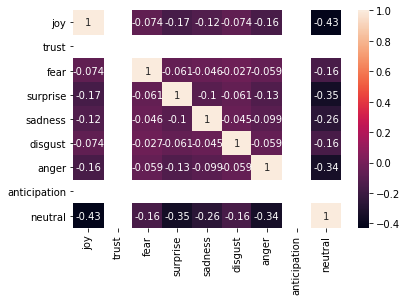

In [ ]:
corr = df_corr.astype('float64').corr()
sn.heatmap(corr, annot=True)
plt.show()

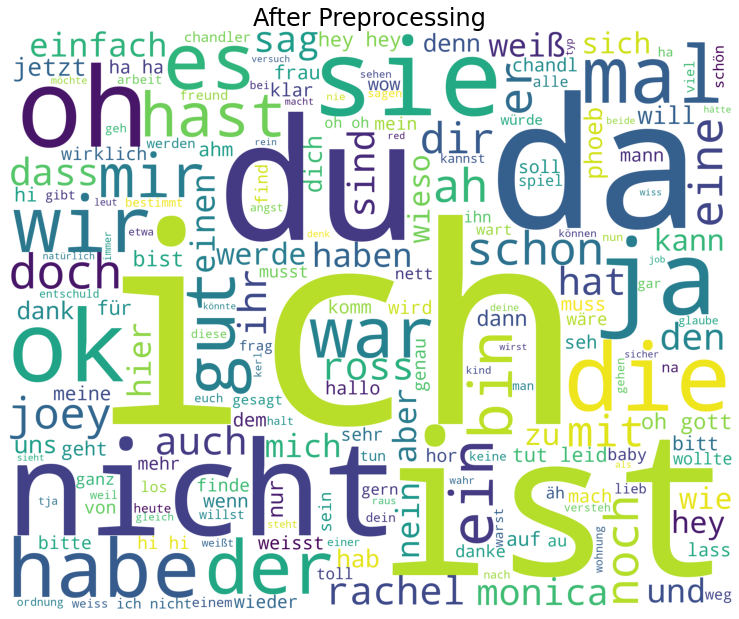

In [ ]:
flat_list = [item for sublist in df['tokens'] for item in sublist]
wordcloud_draw(flat_list, "After Preprocessing", 'white')

## Export of CSV

### Optional: Renaming of emoji columns

In [ ]:
df = df.rename(columns={'😊': 'joy', '🥰': 'trust', '😱': 'fear', '😲': 'surprise', '😢': 'sadness', '🤢': 'disgust', '😡': 'anger', '👀': 'anticipation'})
df.head(40)

,id,user,recipient,sid,timestamp,body,joy,trust,fear,surprise,sadness,disgust,anger,anticipation,tokens
2172,88,user06,user12,15,2021-06-14 18:22:29.301792+00:00,hey na alles klar wie gehts dir,1,1,0,0,0,0,0,1,"[hey, alles, klar, , gehts]"
2164,96,User02,user08,1,2021-06-14 18:22:55.815520+00:00,hey liebe freundin steh vor dem kino und friere,0,0,0,0,0,0,0,1,"[hey, lieb, freundin, steh, dem, kino, friere]"
2163,97,user15,user16,1,2021-06-14 18:23:02.602367+00:00,hey wo bleibst du,0,0,0,0,0,0,1,0,"[hey, bleibst]"
2162,98,user12,user06,15,2021-06-14 18:23:03.517448+00:00,schön von dir zu hören heute war einfach ein s...,1,0,0,0,0,0,0,0,"[schon, dir, hören, war, einfach, super]"
2161,99,User02,user08,1,2021-06-14 18:23:07.238679+00:00,kommst du noch,0,0,0,0,0,0,0,1,"[komm, noch]"
2159,101,user12,user06,15,2021-06-14 18:23:18.741249+00:00,auch das wetter,1,0,0,0,0,0,0,0,"[das, wett]"
2158,102,user01,user07,1,2021-06-14 18:23:20.454133+00:00,hey sag mal wo bleibst du denn du bist ziemlic...,0,0,0,0,1,0,1,0,"[hey, sag, mal, bleibst, denn, bist, ziemlich,..."
2155,105,user12,user06,15,2021-06-14 18:23:33.130605+00:00,und selbst,0,0,0,0,0,0,0,1,[selbst]
2154,106,user06,user12,15,2021-06-14 18:23:49.799062+00:00,ja alles super,1,1,0,0,0,0,0,0,"[alles, sup]"
2153,107,user16,user15,1,2021-06-14 18:23:52.431147+00:00,du sorry ganz blöd gelaufen ich kann leider do...,0,0,0,0,1,0,0,0,"[sorry, blöd, gelauf, kann, doch, kommen]"


### Optional: Drop duplicates

In [ ]:
df.drop_duplicates(subset=['body', 'emotion', 'conversation_id'], keep='first')

KeyError: ignored

In [ ]:
df = df.drop_duplicates(subset=['ID', 'body', 'emotion', 'conversation_id'], keep='first')

In [ ]:
df.loc[50:60]

,ID,body,emotion,conversation_id,tokens
50,531,ok ok,neutral,221,"[ok, ok]"
51,582,entschuldige die verspätung ich wurde im büro ...,neutral,221,"[entschuldige, verspätung, büro, aufgehalten]"
52,584,hi,neutral,296,[hi]
53,585,erinnerst du dich an susan sie ist unvergesslich,surprise,296,"[erinnerst, susan, unvergesslich]"
54,585,erinnerst du dich an susan sie ist unvergesslich,neutral,296,"[erinnerst, susan, unvergesslich]"
55,586,ross,neutral,296,[ross]
56,587,hallo susan guter händedruck sehr gut,anger,296,"[hallo, susan, händedruck]"
57,589,dr oberman ok und er ist,neutral,296,"[dr, oberman, ok]"


In [ ]:
df

,ID,body,emotion,conversation_id,joy,trust,fear,surprise,sadness,disgust,anger,anticipation,neutral,tokens
0,10,ich bin wieder in der highschool stehe mitten ...,neutral,559,0,0,0,0,0,0,0,0,1,"[highschool, stehe, mitten, cafeteria]"
1,12,den traum hatte ich auch schon mal,neutral,559,0,0,0,0,0,0,0,0,1,"[traum, mal]"
2,13,dann schaue ich runter und erkenne dass da ein...,surprise,559,0,0,0,1,0,0,0,0,0,"[schaue, runter, erkenne, telefon]"
5,17,ganz plötzlich fängt das telefon an zu klingeln,neutral,559,0,0,0,0,0,0,0,0,1,"[plötzlich, fängt, telefon, klingeln]"
6,20,hi,neutral,75,0,0,0,0,0,0,0,0,1,[hi]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10259,84294,es hat mir geholfen dein gesicht in der menge ...,joy,610,1,0,0,0,0,0,0,0,0,"[geholfen, gesicht, menge, sehen]"
10260,84397,tja ich werde jetzt sehen ob ich ein zimmer be...,neutral,1,0,0,0,0,0,0,0,0,1,"[tja, sehen, zimmer, bekommen]"
10261,84441,glaubst du ja,neutral,162,0,0,0,0,0,0,0,0,1,[glaubst]
10262,84442,glaubst du das wirklich ja,neutral,162,0,0,0,0,0,0,0,0,1,[glaubst]


### Export

In [ ]:
# Choose one of the following: 
# Find the exported csv-file on the left  side in "Dateien"

# Option 1: CSV without preceding indeces of each row
df.to_csv('/content/gdrive/My Drive/Sentiment/clean_data_friends_no_stemming.csv', encoding='utf-8', index=False)
#df_corr.to_csv('df_corr.csv', encoding='utf-8', index=False)

#Option 2: CSV with preceding indeces
#df.to_csv('clean_data_indeces.csv', encoding='utf-8')